<a href="https://colab.research.google.com/github/SNCA-24/Optimise-Flow---by-Simulated-Annealing-Algo/blob/main/Optimise_Flow_from_source_to_sink_using_Simulated_Annealing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Define flow and capacity for the test case graph

Use the following code block for creating the graph for R1 of Part B.

In [ ]:
import networkx as nx

In [ ]:
G = nx.DiGraph()   #unlike in Project 1, the edges in the network are directed.
G.add_edges_from([(0, 1, {'flow': 2}), (0, 1,{'capacity': 6}),
 (0, 2,{'flow': 3}), (0, 2,{'capacity': 3}),
  (0,3,{'flow': 4}), (0,3,{'capacity': 5}),
   (1,2, {'flow': 1}), (1,2,{'capacity': 5}),
    (1,5, {'flow': 1}), (1,5,{'capacity': 3}),              # modified from last version: edge (1,4) replaced by edge (1,5)
     (2,4, {'flow': 2}), (2,4,{'capacity': 9}),
      (2,5, {'flow': 4}), (2,5,{'capacity': 8}),
       (3,2, {'flow': 2}), (3,2,{'capacity': 2}),
        (3,4,{'flow': 2}), (3,4,{'capacity': 3}),
         (4,5, {'flow': 4}), (4,5,{'capacity': 5})])

Obtain all paths from a *source* node to a *target* node. This is done by a depth first search. In case, the number of paths searched is excessive we can cut off the search at depth given by *cutoff*, this is essentially a depth limited search.

In [ ]:
for path in nx.all_simple_edge_paths(G, source=0, target=5, cutoff=9):
  print(path)

[(0, 1), (1, 2), (2, 4), (4, 5)]
[(0, 1), (1, 2), (2, 5)]
[(0, 1), (1, 5)]
[(0, 2), (2, 4), (4, 5)]
[(0, 2), (2, 5)]
[(0, 3), (3, 2), (2, 4), (4, 5)]
[(0, 3), (3, 2), (2, 5)]
[(0, 3), (3, 4), (4, 5)]


{(0, 1): 2, (0, 2): 3, (0, 3): 4, (1, 2): 1, (1, 5): 1, (2, 4): 2, (2, 5): 4, (3, 2): 2, (3, 4): 2, (4, 5): 4}


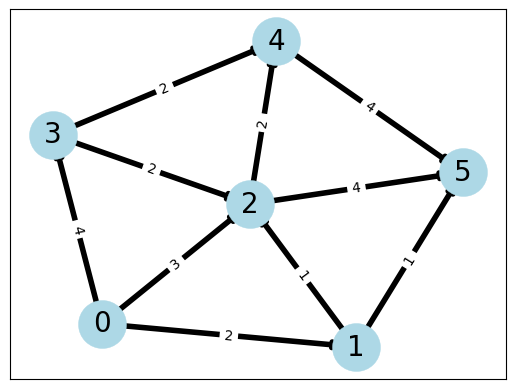

In [ ]:
import matplotlib.pyplot as plt

links = [(u, v) for (u, v, d) in G.edges(data=True)]
pos = nx.nx_pydot.graphviz_layout(G)
nx.draw_networkx_nodes(G, pos, node_size=1200, node_color='lightblue', linewidths=0.25) # draw nodes
nx.draw_networkx_edges(G, pos, edgelist=links, width=4)                                 # draw edges

# node labels
nx.draw_networkx_labels(G, pos, font_size=20, font_family="sans-serif")
# edge weight labels
edge_labels = nx.get_edge_attributes(G, 'flow')
print(edge_labels)
nx.draw_networkx_edge_labels(G, pos, edge_labels)

plt.show()

In [ ]:
from networkx.algorithms.flow import edmonds_karp
R = edmonds_karp(G, 0, 5)
flow_value = nx.maximum_flow_value(R, 0, 5) # The Edmonds Karp algorithm computes out the optimal flow for any given graph. Note that node 4 represents the sink node T.
print(flow_value)

14


In [ ]:
import random
import math

Use the following code (modify number of nodes and connectivity) for R2 and R3.

In [ ]:
N=5
G=nx.gnp_random_graph(N, 0.6, directed=True)  # here we create a directed random binomial graph with N nodes and an average (expected) connectivity of N*0.6.
print (G.nodes())

[0, 1, 2, 3, 4]


In [ ]:
nx.is_weakly_connected(G)      # check if G is connected. The weakly connected property is the same as the
                               # as the concept of connectedness in an undirected graph.

True

In [ ]:
print (G.edges())

[(0, 1), (1, 0), (1, 2), (1, 3), (1, 4), (2, 0), (2, 4), (3, 0), (3, 2), (3, 4), (4, 0), (4, 1), (4, 2), (4, 3)]


In [ ]:
G = nx.DiGraph()   #unlike in Project 1, the edges in the network are directed.
G.add_edges_from([(0, 1, {'flow': 2}), (0, 1,{'capacity': 6}),
 (0, 2,{'flow': 3}), (0, 2,{'capacity': 3}),
  (0,3,{'flow': 4}), (0,3,{'capacity': 5}),
   (1,2, {'flow': 1}), (1,2,{'capacity': 5}),
    (1,5, {'flow': 1}), (1,5,{'capacity': 3}),              # modified from last version: edge (1,4) replaced by edge (1,5)
     (2,4, {'flow': 2}), (2,4,{'capacity': 9}),
      (2,5, {'flow': 4}), (2,5,{'capacity': 8}),
       (3,2, {'flow': 2}), (3,2,{'capacity': 2}),
        (3,4,{'flow': 2}), (3,4,{'capacity': 3}),
         (4,5, {'flow': 4}), (4,5,{'capacity': 5})])

for path in nx.all_simple_edge_paths(G, source=0, target=5, cutoff=9):
  print(path)

N=5
G=nx.gnp_random_graph(N, 0.6, directed=True)  # here we create a directed random binomial graph with N nodes and an average (expected) connectivity of N*0.6.
print (G.nodes())

nx.is_weakly_connected(G)      # check if G is connected. The weakly connected property is the same as the

print (G.edges())


[(0, 1), (1, 2), (2, 4), (4, 5)]
[(0, 1), (1, 2), (2, 5)]
[(0, 1), (1, 5)]
[(0, 2), (2, 4), (4, 5)]
[(0, 2), (2, 5)]
[(0, 3), (3, 2), (2, 4), (4, 5)]
[(0, 3), (3, 2), (2, 5)]
[(0, 3), (3, 4), (4, 5)]
[0, 1, 2, 3, 4]
[(0, 4), (1, 0), (1, 3), (1, 4), (2, 1), (2, 4), (3, 0)]


## R1

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import random
import math

# Step 1: Hardcode the graph from Figure 1A (updated graph setup)
def create_figure_1_graph():
    G = nx.DiGraph()
    G.add_edges_from([
        (0, 1, {'flow': 5, 'capacity': 10}),
        (0, 2, {'flow': 3, 'capacity': 8}),
        (0, 3, {'flow': 4, 'capacity': 11}),
        (1, 2, {'flow': 3, 'capacity': 9}),
        (1, 5, {'flow': 2, 'capacity': 3}),  # Sink connection
        (2, 4, {'flow': 7, 'capacity': 9}),
        (2, 5, {'flow': 1, 'capacity': 8}),  # Sink connection
        (3, 2, {'flow': 2, 'capacity': 8}),
        (3, 4, {'flow': 2, 'capacity': 12}),
        (4, 5, {'flow': 9, 'capacity': 9})   # Sink connection
    ])
    return G

# Step 2: Visualize the graph with flow and capacities
def visualize_graph(graph, flow):
    pos = nx.spring_layout(graph)
    capacities = nx.get_edge_attributes(graph, 'capacity')
    labels = {edge: f"{flow[edge]}/{capacities[edge]}" for edge in graph.edges()}

    plt.figure(figsize=(10, 8))
    nx.draw(graph, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=10, font_weight='bold')
    nx.draw_networkx_edge_labels(graph, pos, edge_labels=labels, font_size=8)
    plt.show()

# Step 3: Heuristic Function for Simulated Annealing
def heuristic(graph, flow, sink, scaling_factor=0.1):
    total_flow_into_sink = sum(flow[edge] for edge in graph.in_edges(sink))
    total_unused_capacity = sum(graph.get_edge_data(edge[0], edge[1])['capacity'] - flow[edge] for edge in graph.edges())
    return total_flow_into_sink - scaling_factor * total_unused_capacity

# Step 4: Generate Successor in SA
def generate_successor(graph, current_flow, paths, source, sink):
    if not paths:
        return current_flow, 0

    # Select a random path (list of nodes)
    selected_path = random.choice(paths)
    selected_edges = [(selected_path[i], selected_path[i+1]) for i in range(len(selected_path)-1)]

    # Calculate the minimum remaining capacity along the path
    min_remaining_capacity = min(graph.get_edge_data(edge[0], edge[1])['capacity'] - current_flow[edge] for edge in selected_edges)

    if min_remaining_capacity == 0:
        return current_flow, 0

    # Random flow change, within the allowed range
    flow_change = random.randint(1, min_remaining_capacity) if min_remaining_capacity > 0 else 0
    new_flow = current_flow.copy()

    # Apply flow change to the edges
    for edge in selected_edges:
        new_flow[edge] += flow_change

    # Check flow conservation at nodes (excluding source and sink)
    for node in graph.nodes:
        if node != source and node != sink:
            inflow = sum(new_flow[edge] for edge in graph.in_edges(node))
            outflow = sum(new_flow[edge] for edge in graph.out_edges(node))
            if inflow != outflow:
                return current_flow, 0  # Violation of flow conservation, return original

    return new_flow, flow_change

# Step 5: Simulated Annealing Algorithm with Maximum Iterations
def simulated_annealing(graph, source, sink, initial_temp, alpha, max_iterations, epsilon=1e-8):
    paths = list(nx.all_simple_paths(graph, source, sink))
    current_flow = {edge: 0 for edge in graph.edges()}
    best_flow = current_flow
    best_solution = heuristic(graph, best_flow, sink)
    temperature = initial_temp

    iteration = 0  # Initialize iteration counter

    # SA loop with cooling and maximum iterations limit
    while temperature > epsilon and iteration < max_iterations:
        new_flow, flow_change = generate_successor(graph, current_flow, paths, source, sink)

        if flow_change == 0:
            continue  # Skip if no flow change

        current_value = heuristic(graph, current_flow, sink)
        new_value = heuristic(graph, new_flow, sink)
        delta_E = new_value - current_value

        # Accept better or worse solutions based on probability
        if delta_E > 0 or random.random() < math.exp(delta_E / temperature):
            current_flow = new_flow
            if new_value > best_solution:
                best_flow = current_flow
                best_solution = new_value

        temperature *= (1 - alpha)  # Cooling
        iteration += 1  # Increment iteration count

    return best_flow, best_solution

# Step 6: Compute the total flow into the sink
def total_flow_into_sink(graph, flow, sink):
    return sum(flow[edge] for edge in graph.in_edges(sink))

# Step 7: Run Simulated Annealing and Visualize the Result
if __name__ == "__main__":
    graph = create_figure_1_graph()
    source = 0
    sink = 5
    initial_temp = 1000
    alpha = 0.01
    max_iterations = 1000  # Set the maximum number of iterations

    # Get the flow into the sink before running Simulated Annealing
    initial_flow = {edge: graph.get_edge_data(edge[0], edge[1])['flow'] for edge in graph.edges()}
    print("Flow into sink before SA:", total_flow_into_sink(graph, initial_flow, sink))  # Should now match 12

    # Run Simulated Annealing with maximum iterations
    best_flow, best_solution = simulated_annealing(graph, source, sink, initial_temp, alpha, max_iterations)

    print("Best Flow Solution:", best_flow)
    print("Flow into sink after SA:", total_flow_into_sink(graph, best_flow, sink))
    print("Best Total Flow (Heuristic Value):", best_solution)

    # Visualize the graph after running SA
    visualize_graph(graph, best_flow)

    # Step 8: Compare with Edmonds-Karp for Optimal Flow
    optimal_flow = nx.maximum_flow_value(graph, source, sink)
    print("Edmonds-Karp Optimal Flow Value:", optimal_flow)

Flow into sink before SA: 12


KeyboardInterrupt: 

# R2

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import random
import math

# Step 1: Generate a Random Graph with 30 Nodes and Average Connectivity of 3
def create_random_graph(num_nodes=30, connectivity=0.1, capacity_range=(1, 10)):
    G = nx.erdos_renyi_graph(n=num_nodes, p=connectivity, directed=True)

    # Assign random capacities to edges
    for u, v in G.edges():
        G[u][v]['capacity'] = random.randint(*capacity_range)

    return G

# Simulated Annealing and Edmonds-Karp comparison for R2
def compare_sa_and_edmonds_karp(graph, source, sink, initial_temp, alpha, max_iterations):
    # Run Simulated Annealing
    best_flow, best_solution = simulated_annealing(graph, source, sink, initial_temp, alpha, max_iterations)
    print(f"Simulated Annealing Total Flow: {best_solution}")

    # Run Edmonds-Karp to find the optimal flow
    optimal_flow_value = nx.maximum_flow_value(graph, source, sink)
    print(f"Edmonds-Karp Optimal Flow Value: {optimal_flow_value}")

    return best_solution, optimal_flow_value

# Main function for R2
if __name__ == "__main__":
    # Create random graph with 30 nodes and average connectivity of 3
    graph = create_random_graph(num_nodes=30, connectivity=0.1)

    source = 0  # Source node
    sink = 29   # Sink node

    initial_temp = 1000
    alpha = 0.01
    max_iterations = 1000

    # Compare Simulated Annealing and Edmonds-Karp results
    sa_flow, ek_flow = compare_sa_and_edmonds_karp(graph, source, sink, initial_temp, alpha, max_iterations)

    print(f"Simulated Annealing Flow: {sa_flow}")
    print(f"Edmonds-Karp Flow: {ek_flow}")

KeyboardInterrupt: 

# R3

In [ ]:
import networkx as nx
import random

# Function to run multiple SA experiments and calculate the average flow
def run_multiple_sa_experiments(num_experiments, initial_temp, alpha, num_nodes=30, connectivity=0.1):
    total_flow = 0
    for i in range(num_experiments):
        # Generate a random graph for each experiment
        graph = create_random_graph(num_nodes, connectivity)
        source = 0
        sink = num_nodes - 1  # Assuming the last node is the sink

        # Run Simulated Annealing
        best_flow, best_solution = simulated_annealing(graph, source, sink, initial_temp, alpha)

        # Accumulate the total flow
        total_flow += best_solution

    # Calculate the average flow
    average_flow = total_flow / num_experiments
    return average_flow

# R3a: Run SA with 30 random graphs, initial temperature of 100
def r3a_sa_experiment():
    num_experiments = 30
    initial_temp = 100
    alpha = 0.01
    average_flow_100 = run_multiple_sa_experiments(num_experiments, initial_temp, alpha)
    print(f"Average Flow with T=100: {average_flow_100}")
    return average_flow_100

# R3b: Run SA with 30 random graphs, initial temperature of 1000
def r3b_sa_experiment():
    num_experiments = 30
    initial_temp = 1000
    alpha = 0.01
    average_flow_1000 = run_multiple_sa_experiments(num_experiments, initial_temp, alpha)
    print(f"Average Flow with T=1000: {average_flow_1000}")
    return average_flow_1000

# Main function for R3
if __name__ == "__main__":
    # Run R3a: Initial temperature of 100
    avg_flow_100 = r3a_sa_experiment()

    # Run R3b: Initial temperature of 1000
    avg_flow_1000 = r3b_sa_experiment()

    # R3c: Compare and analyze the results
    print(f"Difference between Avg Flow with T=100 and T=1000: {avg_flow_1000 - avg_flow_100}")

Average Flow with T=100: -38.529999999999994
Average Flow with T=1000: -37.123333333333335
Difference between Avg Flow with T=100 and T=1000: 1.4066666666666592
